In [299]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [300]:
# 폰트 한글화 세팅

# # window font setting
# font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 폰트를 적용하여 시각화

# # PJE font setting
plt.rcParams['font.family'] = 'Malgun Gothic' 

# mac font setting
#font_path = '/Library/Fonts/Arial Unicode.ttf'
#font = fm.FontProperties(fname=font_path).get_name()
#matplotlib.rc('font', family=font)

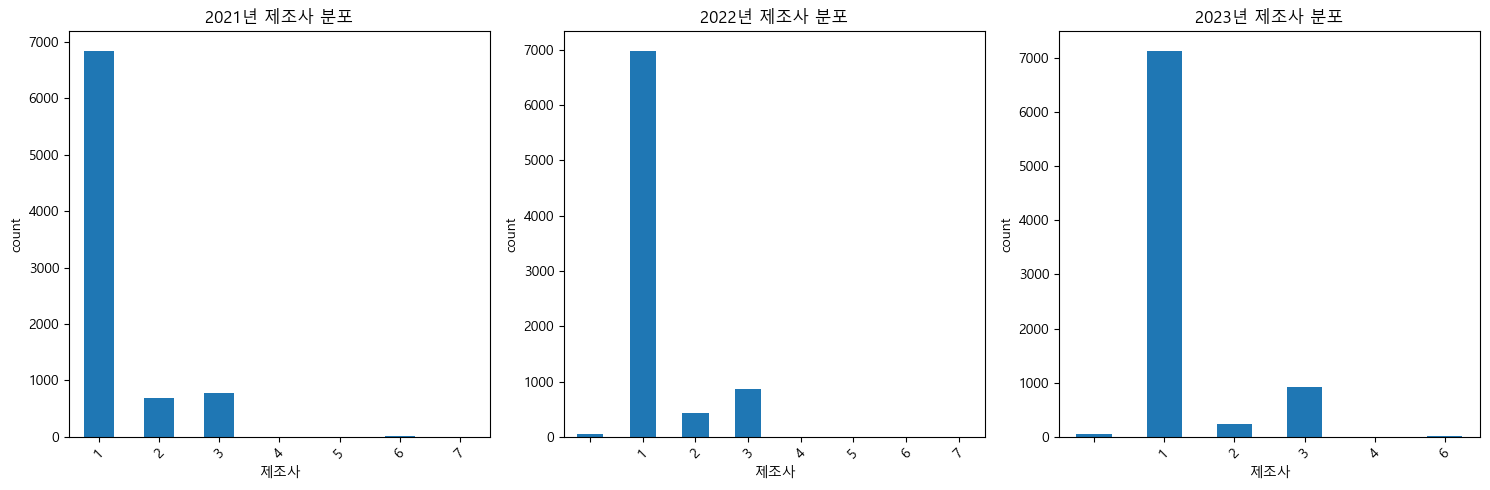

In [301]:
# 시각화 자료로 년도별 제조사 확인

# CSV 파일 읽기
phone_df = pd.read_csv('./data/phone_information.csv', low_memory=False)


# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
phone_df['brand_21'].value_counts().sort_index().plot(kind='bar')
plt.title('2021년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2022년 데이터
plt.subplot(1, 3, 2)
phone_df['brand_22'].value_counts().sort_index().plot(kind='bar')
plt.title('2022년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2023년 데이터
plt.subplot(1, 3, 3)
phone_df['brand_23'].value_counts().sort_index().plot(kind='bar')
plt.title('2023년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# 데이터 형변환

In [302]:
# # 데이터 값을 unique로 찍어본 결과 str로 들어가있는 데이터가 있어 int로 형변환 해주어야 함
# print(phone_df['brand_21'].unique())
# print(phone_df['brand_22'].unique())
# print(phone_df['brand_23'].unique())
# print(phone_df['money_transfer_21'].unique())

# object 타입인 컬럼들 찾기
object_columns = phone_df.select_dtypes(include=['object']).columns

# object 타입 컬럼들을 숫자형으로 변환
for col in object_columns:
    phone_df.loc[:, col] = pd.to_numeric(phone_df[col], errors='coerce').astype('Int64')

# 변환된 컬럼 수 확인
print(f"\n변환된 컬럼 수: {len(object_columns)}개")
print("변환된 컬럼:", list(object_columns))


변환된 컬럼 수: 31개
변환된 컬럼: ['service_purchase_21', 'money_transfer_21', 'cradit_card_21', 'call_check_22', 'service_purchase_22', 'money_transfer_22', 'cradit_card_22', 'agency_purchase_22', 'machine_purchase_22', 'phone_owner_22', 'data_22', 'dmb_22', 'agency_22', 'voice_service_22', 'data_service_22', 'use_date_22', 'brand_22', 'call_check_23', 'service_purchase_23', 'money_transfer_23', 'cradit_card_23', 'agency_purchase_23', 'machine_purchase_23', 'phone_owner_23', 'data_23', 'dmb_23', 'agency_23', 'voice_service_23', 'data_service_23', 'use_date_23', 'brand_23']


# 값이 없는 데이터 제거

In [303]:
# NA값이 있는 컬럼들 확인

na_columns = phone_df.columns[phone_df.isna().any()].tolist()
print("NA가 있는 컬럼들:")
for col in na_columns:
    na_count = phone_df[col].isna().sum()
    print(f"{col}: {na_count}개의 NA")

print("\n전체 NA 제거 전 데이터 크기:", phone_df.shape)

# 방법 1: NA가 있는 행을 모두 제거
phone_df = phone_df.dropna()
print("\n전체 NA 제거 후 데이터 크기:", phone_df.shape)

NA가 있는 컬럼들:
service_purchase_21: 214개의 NA
money_transfer_21: 214개의 NA
cradit_card_21: 214개의 NA
call_check_22: 45개의 NA
service_purchase_22: 149개의 NA
money_transfer_22: 149개의 NA
cradit_card_22: 149개의 NA
agency_purchase_22: 5개의 NA
machine_purchase_22: 5개의 NA
phone_owner_22: 5개의 NA
data_22: 45개의 NA
dmb_22: 45개의 NA
agency_22: 45개의 NA
voice_service_22: 45개의 NA
data_service_22: 45개의 NA
use_date_22: 45개의 NA
brand_22: 45개의 NA
call_check_23: 45개의 NA
service_purchase_23: 85개의 NA
money_transfer_23: 85개의 NA
cradit_card_23: 85개의 NA
agency_purchase_23: 4개의 NA
machine_purchase_23: 4개의 NA
phone_owner_23: 4개의 NA
data_23: 45개의 NA
dmb_23: 45개의 NA
agency_23: 45개의 NA
voice_service_23: 45개의 NA
data_service_23: 45개의 NA
use_date_23: 45개의 NA
brand_23: 45개의 NA

전체 NA 제거 전 데이터 크기: (8342, 73)

전체 NA 제거 후 데이터 크기: (8071, 73)


In [304]:
# 3년간 삼성을 쓰지 않는 고객 제거

phone_df = phone_df[(phone_df['brand_21'] == 1) | 
                    (phone_df['brand_22'] == 1) ]

print("\n삼성을 쓰지 않는 사람 제거 후 데이터 크기:", phone_df.shape)


삼성을 쓰지 않는 사람 제거 후 데이터 크기: (7324, 73)


# 2021 -> 2022 (이탈자), 2022 -> 2023 (이탈자), 2021 -> 2022 -> 2023 (복귀자)

In [305]:
# 2022년도 이탈자

# 값 빼줌
samsung_users22 = phone_df[
   (phone_df['brand_21'] == 1)
]
changed_users22 = phone_df[
   (phone_df['brand_21'] == 1) & 
   (phone_df['brand_22'] != 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users22))
print('2022 이탈률: ', (len(changed_users22) / len(samsung_users22)))
print("\n변경된 사례:")
print(changed_users22[['pid', 'brand_21', 'brand_22']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_22 = changed_users22['brand_22'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_22)

브랜드 변경 고객 수: 523
2022 이탈률:  0.0789433962264151

변경된 사례:
            pid  brand_21 brand_22
1         10002         1        3
72       440001         1        2
75       440004         1        2
95       550002         1        3
105      600005         1        3
...         ...       ...      ...
8215  116530001         1        3
8216  116530002         1        3
8225  116720002         1        2
8226  116720003         1        3
8227  116720004         1        3

[523 rows x 3 columns]

변경된 브랜드 분포:
brand_22
3    308
2    212
6      2
4      1
Name: count, dtype: int64


In [306]:
# 2023년도 이탈자

changed_users23 = phone_df[
   (phone_df['brand_22'] == 1) & 
   (phone_df['brand_23'] != 1)
]

samsung_users23 = phone_df[
   (phone_df['brand_22'] == 1) 
]

print('2022 이탈률: ', (len(changed_users23) / len(samsung_users23)))

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users23))
print("\n변경된 사례:")
print(changed_users23[['pid', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_23 = changed_users23['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_23)

2022 이탈률:  0.06499044258197324
브랜드 변경 고객 수: 442

변경된 사례:
            pid brand_22 brand_23
19       100002        1        3
23       160001        1        2
39       300003        1        3
40       300004        1        3
43       310003        1        3
...         ...      ...      ...
8152  115890003        1        3
8156  115910004        1        3
8238  116990001        1        2
8242  117020001        1        2
8265  117300001        1        2

[442 rows x 3 columns]

변경된 브랜드 분포:
brand_23
3    329
2    106
4      4
6      3
Name: count, dtype: int64


In [307]:
# 2023년도 복귀자       ->     복귀자는 다시 생각해보겠지만 일단 이탈자만 생각하기로 함

returned_users = phone_df[
    (phone_df['brand_21'] == 1) &
   (phone_df['brand_22'] != 1) & 
   (phone_df['brand_23'] == 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(returned_users))
print("\n변경된 사례:")
print(returned_users[['pid', 'brand_21', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_return_23 = returned_users['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_return_23)

브랜드 변경 고객 수: 333

변경된 사례:
            pid  brand_21 brand_22 brand_23
1         10002         1        3        1
72       440001         1        2        1
75       440004         1        2        1
105      600005         1        3        1
107      620001         1        3        1
...         ...       ...      ...      ...
8098  115420002         1        2        1
8153  115910001         1        2        1
8215  116530001         1        3        1
8216  116530002         1        3        1
8225  116720002         1        2        1

[333 rows x 4 columns]

변경된 브랜드 분포:
brand_23
1    333
Name: count, dtype: int64


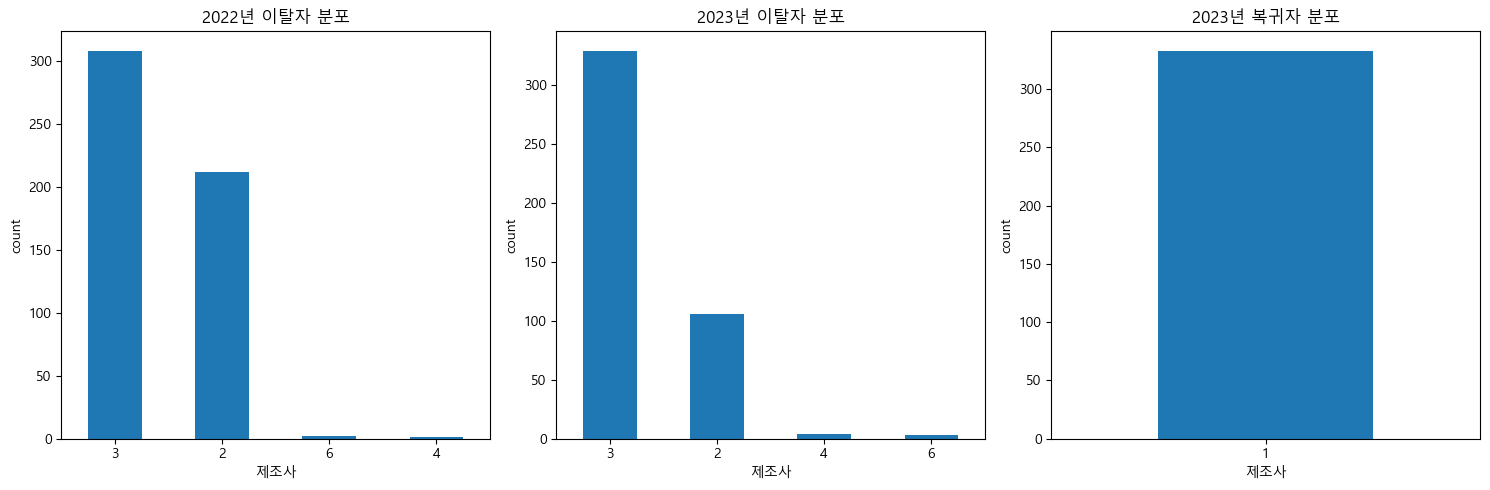

In [308]:
# 시각화 자료로 이탈자, 복귀자 확인

# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
brand_change_22.plot(kind='bar')
plt.title('2022년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2022년 데이터
plt.subplot(1, 3, 2)
brand_change_23.plot(kind='bar')
plt.title('2023년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2023년 데이터
plt.subplot(1, 3, 3)
brand_return_23.plot(kind='bar')
plt.title('2023년 복귀자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

plt.tight_layout()

plt.show()

In [309]:
total_customer = phone_df['pid'].count()
print(f'전체 인원 수 :{total_customer}')

total_samsung_21 = phone_df[phone_df['brand_21'] == 1]['brand_21'].count()
print(f'21년도 삼성 인원 수 :{total_samsung_21}')

total_samsung_22 = phone_df[phone_df['brand_22'] == 1]['brand_22'].count()
print(f'22년도 삼성 인원 수 :{total_samsung_22}')

total_samsung_23 = phone_df[phone_df['brand_23'] == 1]['brand_23'].count()
print(f'23년도 삼성 인원 수 :{total_samsung_23}')

total_chaged = len(changed_users22) + len(changed_users23)

print(f'전체 이탈자 수 :{total_chaged}')

total_merged = phone_df[phone_df['brand_23'] == 1]['brand_23'].count() + total_chaged
print(f'이탈자를 포함한 총 고객 수 :{total_merged}')

전체 인원 수 :7324
21년도 삼성 인원 수 :6625
22년도 삼성 인원 수 :6801
23년도 삼성 인원 수 :6692
전체 이탈자 수 :965
이탈자를 포함한 총 고객 수 :7657


In [310]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 8341
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pid                  7324 non-null   int64 
 1   email_21             7324 non-null   int64 
 2   messenger_21         7324 non-null   int64 
 3   blog_21              7324 non-null   int64 
 4   cloud_21             7324 non-null   int64 
 5   call_check_21        7324 non-null   int64 
 6   service_purchase_21  7324 non-null   object
 7   money_transfer_21    7324 non-null   object
 8   cradit_card_21       7324 non-null   object
 9   agency_purchase_21   7324 non-null   int64 
 10  machine_purchase_21  7324 non-null   int64 
 11  phone_owner_21       7324 non-null   int64 
 12  data_21              7324 non-null   int64 
 13  dmb_21               7324 non-null   int64 
 14  agency_21            7324 non-null   int64 
 15  voice_service_21     7324 non-null   int64 
 16  data_servic

In [311]:
phone_df['call_check_21'].value_counts()

call_check_21
2    5039
1    2285
Name: count, dtype: int64

In [312]:
phone_df.describe()

,pid,email_21,messenger_21,blog_21,cloud_21,call_check_21,agency_purchase_21,machine_purchase_21,phone_owner_21,data_21,...,email_23,messenger_23,blog_23,cloud_23,age_23,school_23,marry_23,salary_23,job_23,religion_23
count,7.324000e+03,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,...,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000
mean,4.959776e+07,1.295057,1.100355,1.932960,1.841480,1.688012,46.721737,7.801202,1.885582,2.999044,...,1.431049,1.048744,1.946068,1.863872,5.590524,3.260923,1.857728,5.311851,1.357182,1.714500
std,3.804781e+07,0.456100,0.300493,0.250108,0.365253,0.463337,18.528685,10.848381,1.368483,0.701240,...,0.495257,0.215347,0.225899,0.342948,1.699097,0.895493,0.618544,3.606020,0.479202,0.451683
min,1.000100e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.610008e+07,1.000000,1.000000,2.000000,2.000000,1.000000,34.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,5.000000,3.000000,2.000000,1.000000,1.000000,1.000000
50%,5.049500e+07,1.000000,1.000000,2.000000,2.000000,2.000000,45.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,6.000000,3.000000,2.000000,6.000000,1.000000,2.000000
75%,6.923500e+07,2.000000,1.000000,2.000000,2.000000,2.000000,56.000000,14.000000,4.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,7.000000,4.000000,2.000000,8.000000,2.000000,2.000000
max,1.183300e+08,2.000000,2.000000,2.000000,2.000000,2.000000,200.000000,110.000000,5.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,4.000000,18.000000,2.000000,2.000000


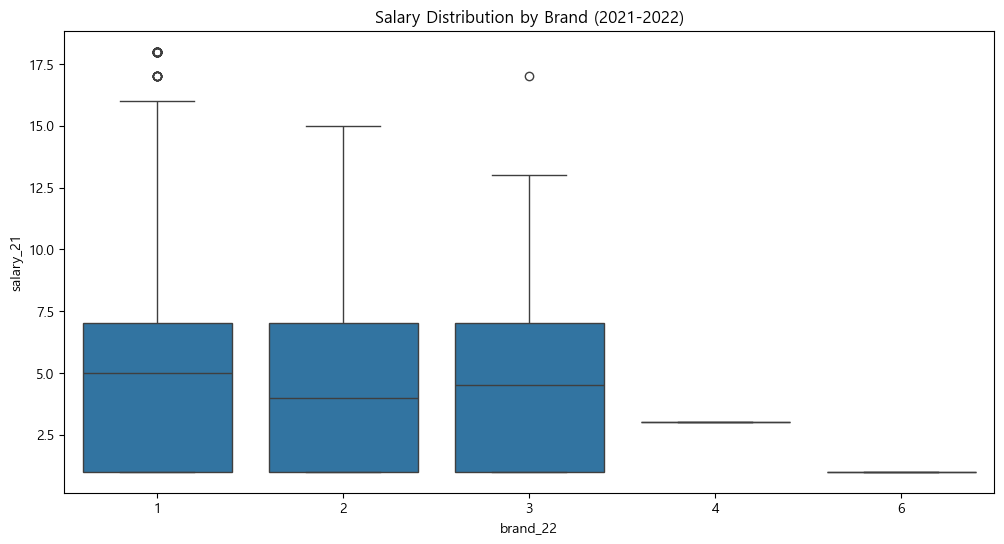

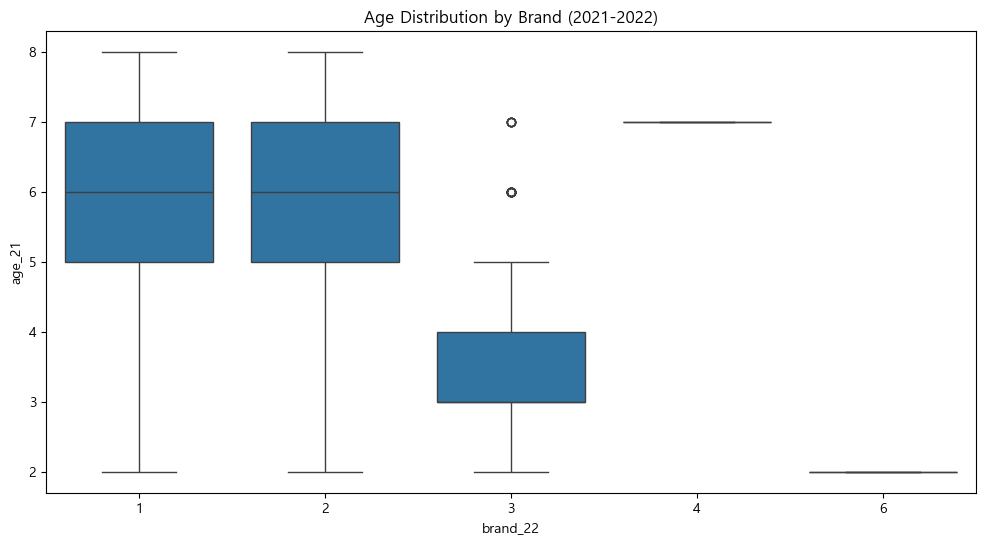

In [313]:
# 각 변수별 이탈 관계 분석 (예: salary와 이탈)
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='salary_21', data=phone_df)
plt.title('Salary Distribution by Brand (2021-2022)')
plt.show()

# 연령대별 이탈 패턴
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='age_21', data=phone_df)
plt.title('Age Distribution by Brand (2021-2022)')
plt.show()

----------

# 21, 22, 23 전부 포함

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


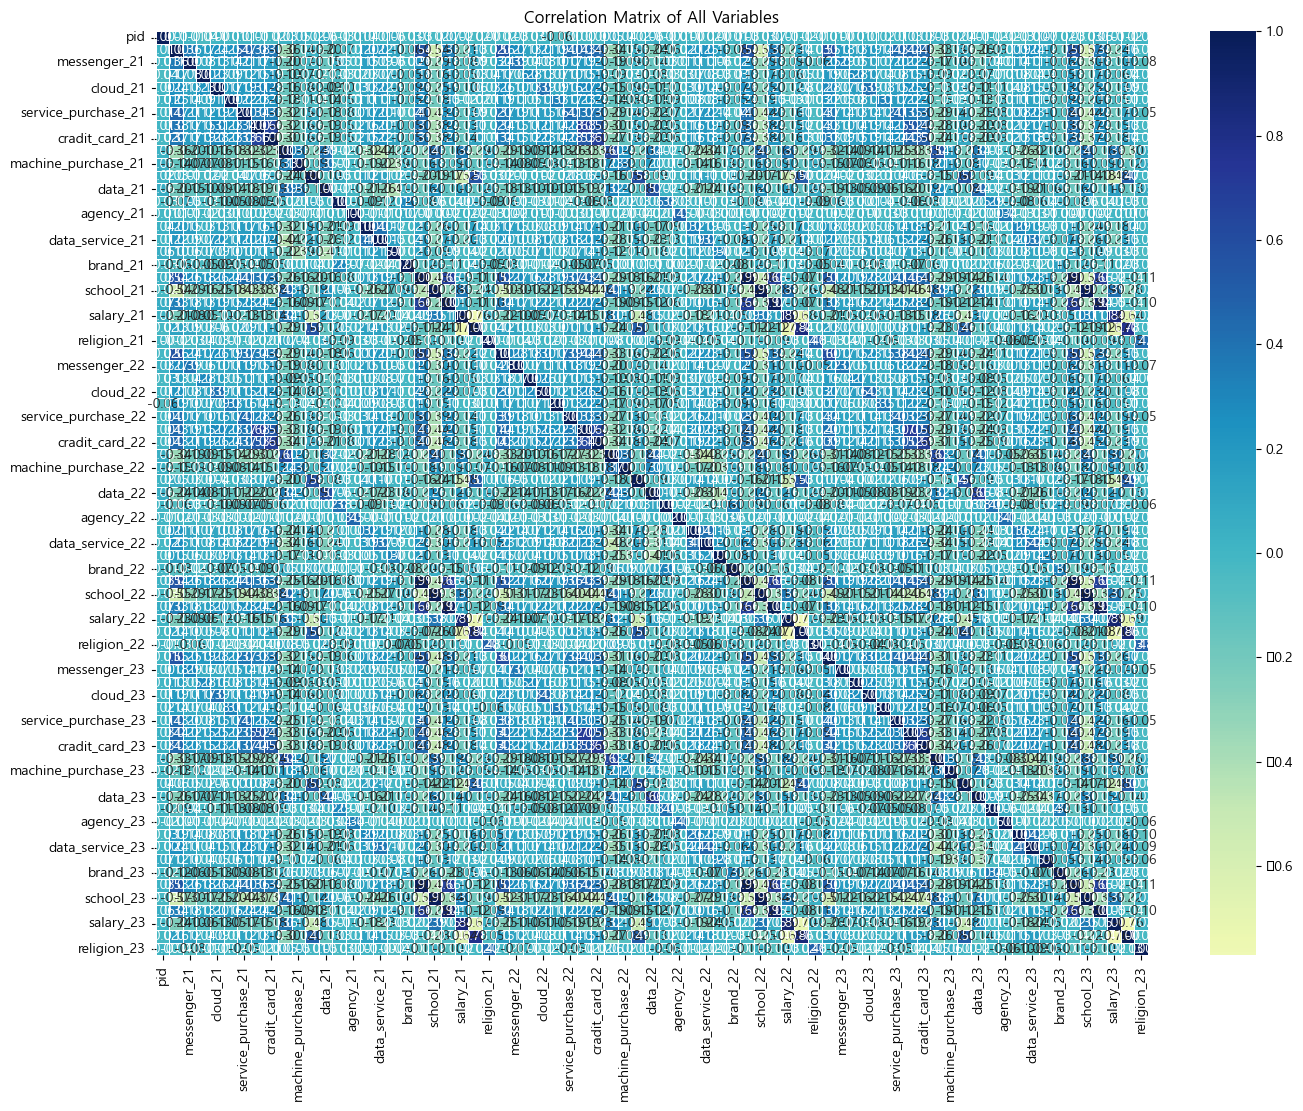

In [314]:
# 전체 컬럼에 대한 상관 행렬 계산
correlation_matrix_all = phone_df.corr()

# 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_all, annot=True, cmap='YlGnBu', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Variables')
plt.show()

# 라이브러리 정리 (정훈)

In [315]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 모델 학습 (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 모델 평가
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 23을 제외하고 selected_features로 적용 (컬럼 전체)

In [316]:
# 23이 포함된 컬럼 제거(컬럼확인)
selected_features = [
    'email_21',
    'messenger_21',
    'blog_21',
    'cloud_21',
    'call_check_21',
    'service_purchase_21',
    'money_transfer_21',
    'cradit_card_21',
    'agency_purchase_21',
    'machine_purchase_21',
    'phone_owner_21',
    'data_21',
    'dmb_21',
    'agency_21',
    'voice_service_21',
    'data_service_21',
    'use_date_21',
    'age_21',
    'school_21',
    'marry_21',
    'salary_21',
    'job_21',
    'religion_21',
    'email_22',
    'messenger_22',
    'blog_22',
    'cloud_22',
    'call_check_22',
    'service_purchase_22',
    'money_transfer_22',
    'cradit_card_22',
    'agency_purchase_22',
    'machine_purchase_22',
    'phone_owner_22',
    'data_22',
    'dmb_22',
    'agency_22',
    'voice_service_22',
    'data_service_22',
    'use_date_22',
    'age_22',
    'school_22',
    'marry_22',
    'salary_22',
    'job_22',
    'religion_22'
]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13932\1829211680.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  phone_df[selected_features] = phone_df[selected_features].fillna(0)  #0으로 할 것인지 논의


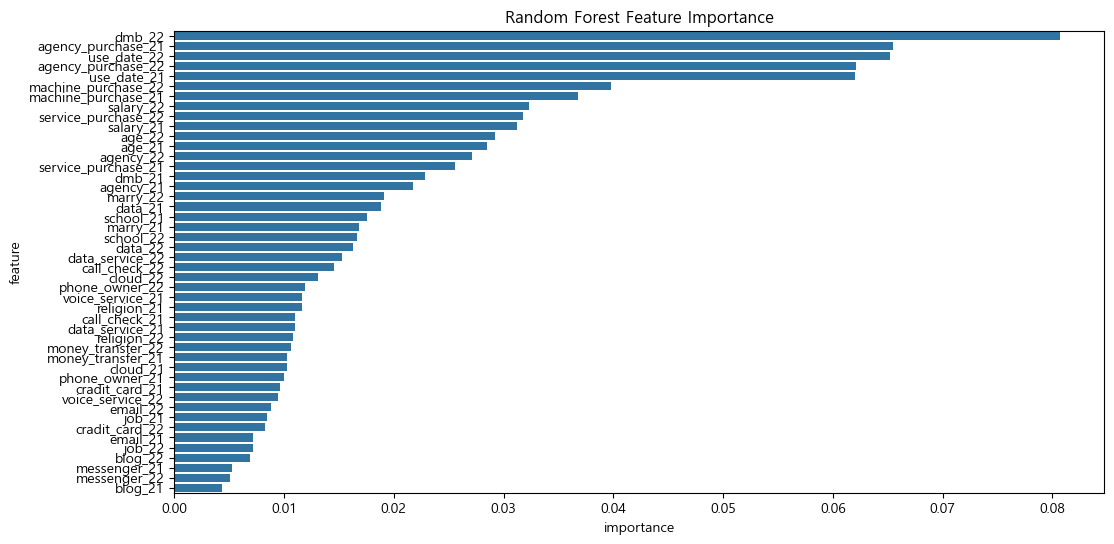

Random Forest 성능:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1353
           1       0.82      0.08      0.15       112

    accuracy                           0.93      1465
   macro avg       0.87      0.54      0.55      1465
weighted avg       0.92      0.93      0.90      1465

Random Forest 정확도: 0.9283



In [317]:
# 결측값을 0으로 채우기 (다른 방법이 있을시 변경)
phone_df[selected_features] = phone_df[selected_features].fillna(0)  #0으로 할 것인지 논의

# 데이터 X, y 설정
X = phone_df[selected_features]
y = (phone_df['brand_22'] != 1).astype(int)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 예측 및 평가
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
classification_rep = classification_report(y_test, rf_pred)

# Random Forest 특성 중요도 계산 및 정렬
importance_rf = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_clf.feature_importances_
}).sort_values('importance', ascending=False)

# Random Forest 특성 중요도 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_rf, x='importance', y='feature')
plt.title('Random Forest Feature Importance')
plt.show()

# 결과 출력
classification_rep, rf_accuracy

print("Random Forest 성능:")
print(classification_rep)
print(f"Random Forest 정확도: {rf_accuracy:.4f}\n")

# ROC 시각화

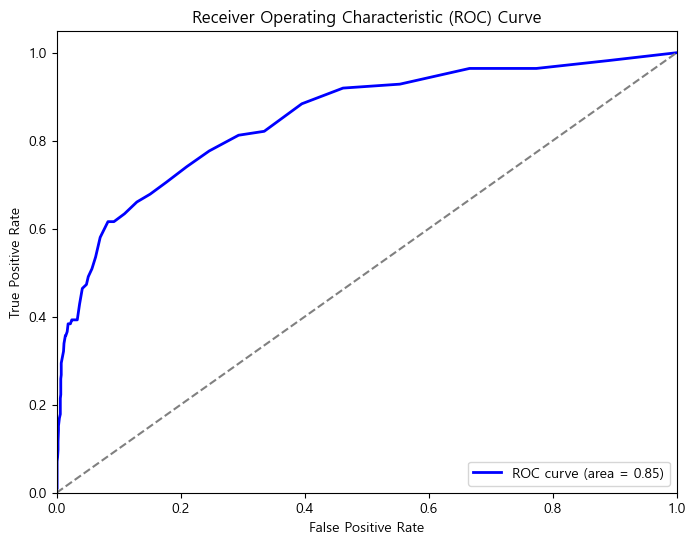

0.8498046668778376

In [318]:
# ROC 커브 계산
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(rf_fpr,rf_tpr)

# ROC 커브 시각화
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr,rf_tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# AUC 값 출력
roc_auc


# Gradient Boosting  활용  (전체 컬럼)

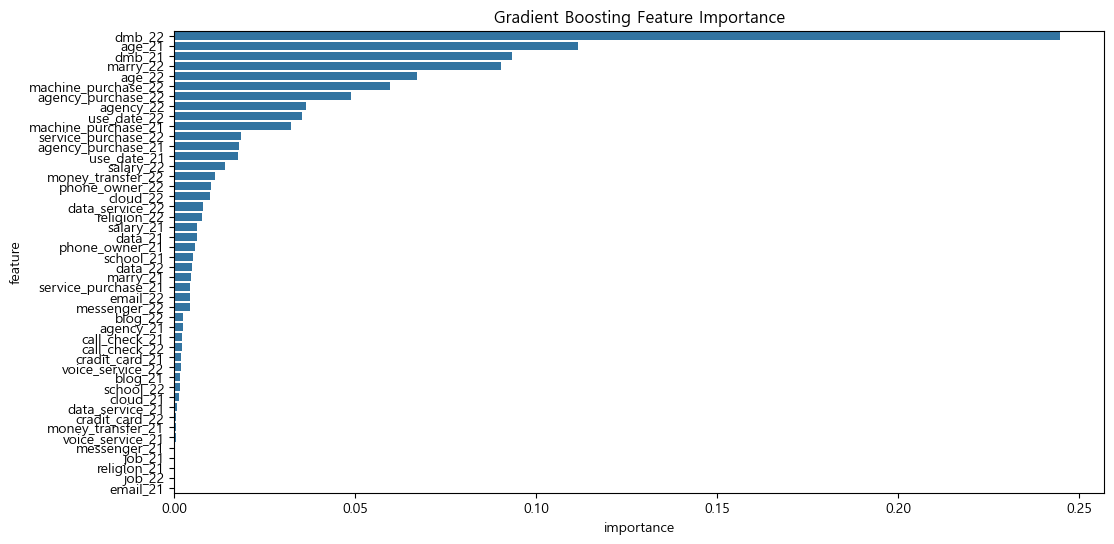

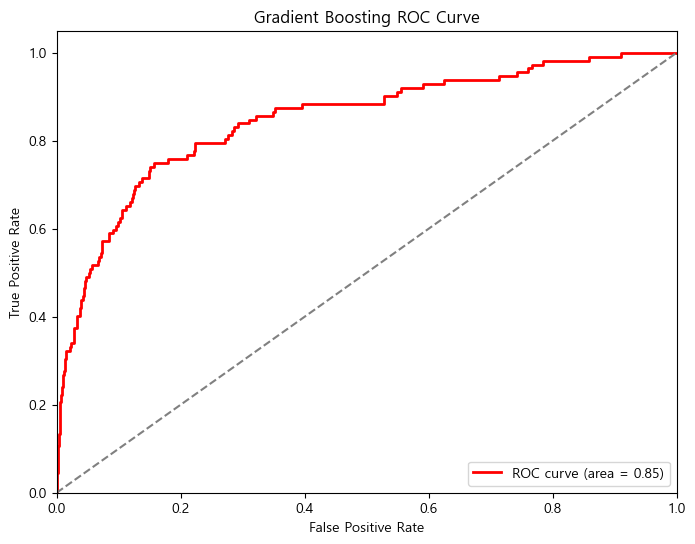

Gradient Boosting 성능:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1353
           1       0.70      0.17      0.27       112

    accuracy                           0.93      1465
   macro avg       0.82      0.58      0.62      1465
weighted avg       0.92      0.93      0.91      1465

Gradient Boosting 정확도: 0.9311


In [319]:



# Gradient Boosting 모델 학습
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# 예측 및 평가
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_classification_rep = classification_report(y_test, gb_pred)

# Gradient Boosting 특성 중요도 계산 및 정렬
importance_gb = pd.DataFrame({
    'feature': selected_features,
    'importance': gb_clf.feature_importances_
}).sort_values('importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_gb, x='importance', y='feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()

# ROC 커브 계산
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])
gb_roc_auc = auc(gb_fpr, gb_tpr)

# ROC 커브 시각화
plt.figure(figsize=(8, 6))
plt.plot(gb_fpr, gb_tpr, color='red', lw=2, label=f'ROC curve (area = {gb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting 성능 결과 출력
gb_classification_rep, gb_accuracy, gb_roc_auc

# Gradient Boosting 성능 출력
print("Gradient Boosting 성능:")
print(gb_classification_rep)
print(f"Gradient Boosting 정확도: {gb_accuracy:.4f}")



# 15개 상관관계 높은 컬러만 남기고, RandomForest 고객 이탈 예측

In [320]:
top_15_features = [
    'dmb_22',               # 0.4581
    'age_22',               # 0.3046
    'age_21',               # 0.3038
    'dmb_21',               # 0.2694
    'marry_22',             # 0.2568
    'marry_21',             # 0.2549
    'cloud_22',             # 0.1750
    'money_transfer_22',    # 0.1707
    'cloud_21',             # 0.1666
    'email_22',             # 0.1564
    'phone_owner_21',       # 0.1394
    'call_check_22',        # 0.1379
    'email_21',             # 0.1364
    'blog_22',              # 0.1279
    'money_transfer_21'     # 0.1241
]


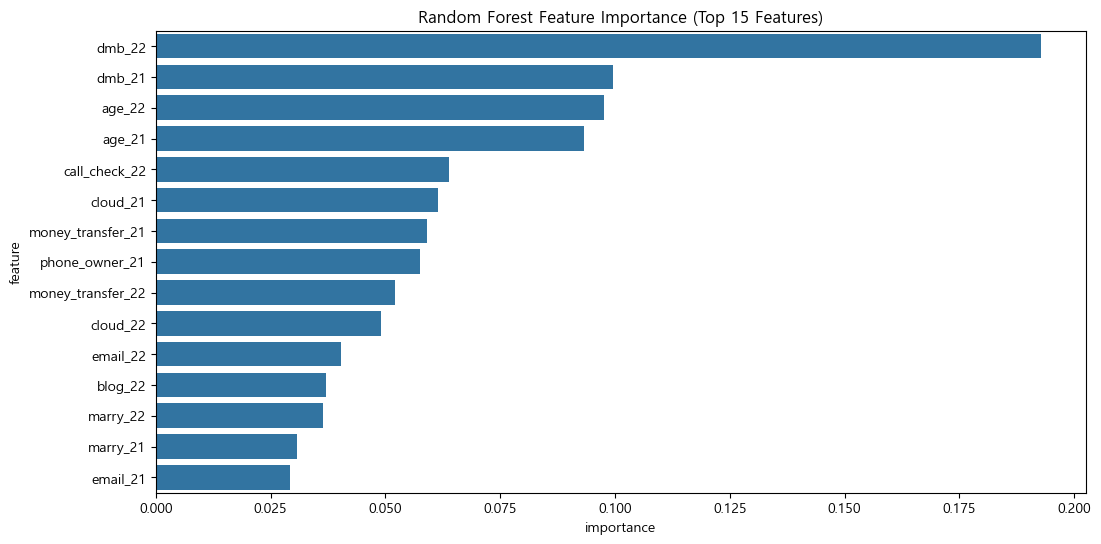

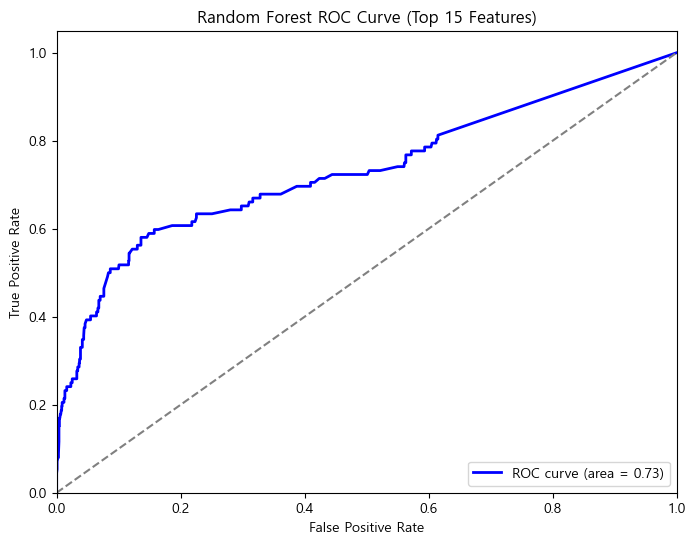

Random Forest 성능 (Top 15 Features):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1353
           1       0.57      0.23      0.33       112

    accuracy                           0.93      1465
   macro avg       0.75      0.61      0.65      1465
weighted avg       0.91      0.93      0.91      1465

Random Forest 정확도 (Top 15 Features): 0.9276


In [321]:
# 데이터 X, y 설정 (상위 15개 컬럼 사용)
X_top15_rf = phone_df[top_15_features].fillna(0)  # 결측값 0으로 채움
y_top15_rf = (phone_df['brand_22'] != 1).astype(int)

# 데이터 분할
X_train_top15_rf, X_test_top15_rf, y_train_top15_rf, y_test_top15_rf = train_test_split(
    X_top15_rf, y_top15_rf, test_size=0.2, random_state=42
)

# Random Forest 모델 학습
rf_clf_top15 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_top15.fit(X_train_top15_rf, y_train_top15_rf)

# 예측 및 평가
rf_pred_top15 = rf_clf_top15.predict(X_test_top15_rf)
rf_accuracy_top15 = accuracy_score(y_test_top15_rf, rf_pred_top15)
rf_classification_rep_top15 = classification_report(y_test_top15_rf, rf_pred_top15)

# 특성 중요도 계산 및 시각화
importance_rf_top15 = pd.DataFrame({
    'feature': top_15_features,
    'importance': rf_clf_top15.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_rf_top15, x='importance', y='feature')
plt.title('Random Forest Feature Importance (Top 15 Features)')
plt.show()

# ROC 커브 계산 및 시각화
rf_fpr_top15, rf_tpr_top15, _ = roc_curve(y_test_top15_rf, rf_clf_top15.predict_proba(X_test_top15_rf)[:, 1])
rf_roc_auc_top15 = auc(rf_fpr_top15, rf_tpr_top15)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr_top15, rf_tpr_top15, color='blue', lw=2, label=f'ROC curve (area = {rf_roc_auc_top15:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (Top 15 Features)')
plt.legend(loc="lower right")
plt.show()

# 결과 출력
print("Random Forest 성능 (Top 15 Features):")
print(rf_classification_rep_top15)
print(f"Random Forest 정확도 (Top 15 Features): {rf_accuracy_top15:.4f}")

# 15개 상관관계 높은 컬러만 남기고, GradientBoost 고객 이탈 예측

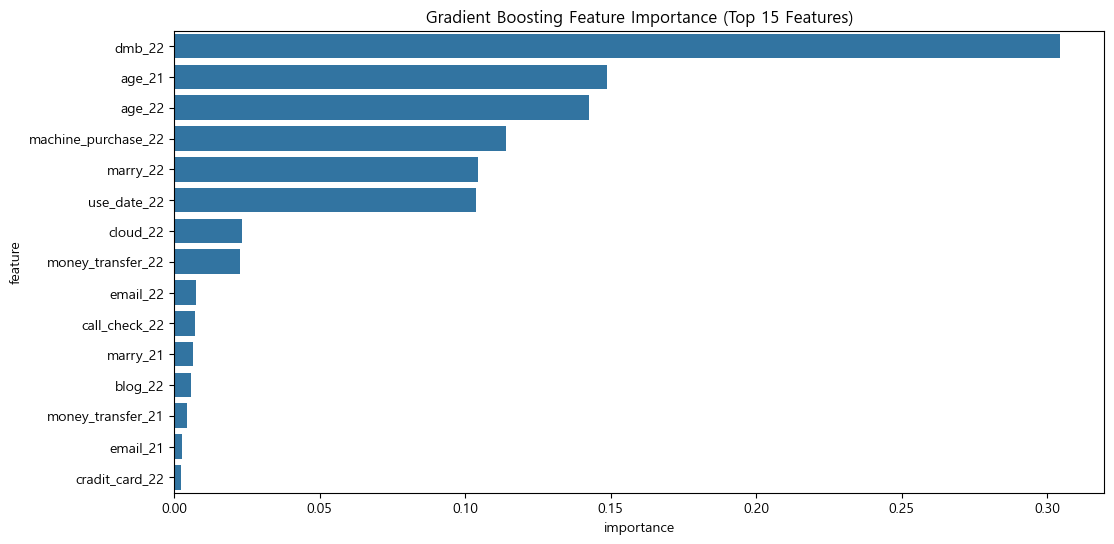

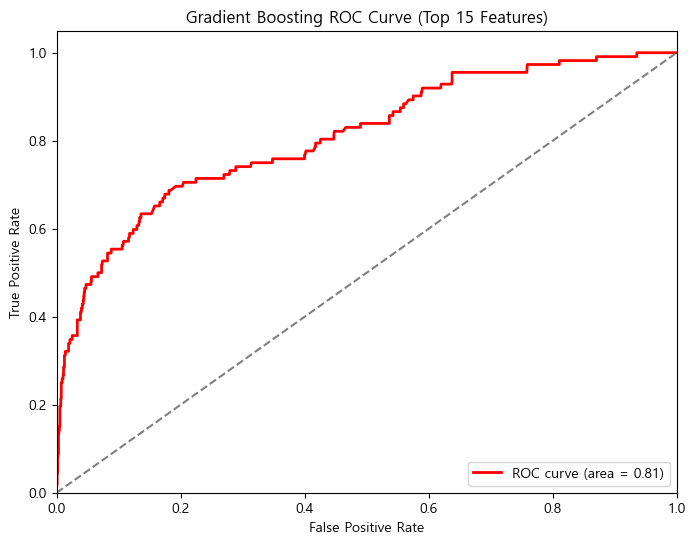

Gradient Boosting 성능 (Top 15 Features):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1353
           1       0.75      0.19      0.30       112

    accuracy                           0.93      1465
   macro avg       0.84      0.59      0.63      1465
weighted avg       0.92      0.93      0.91      1465

Gradient Boosting 정확도 (Top 15 Features): 0.9331


In [322]:
# 상관관계가 높은 15개 컬럼을 다시 계산
top_15_features = phone_df[selected_features].corrwith(phone_df['brand_22']).abs().sort_values(ascending=False).head(15)

# 리스트로 변환하여 사용
selected_top_15_features = top_15_features.index.tolist()

# 데이터 X, y 설정 (상위 15개 컬럼 사용)
X_top15 = phone_df[selected_top_15_features].fillna(0)  # 결측값 0으로 채움
y_top15 = (phone_df['brand_22'] != 1).astype(int)

# 데이터 분할
X_train_top15, X_test_top15, y_train_top15, y_test_top15 = train_test_split(X_top15, y_top15, test_size=0.2, random_state=42)

# Gradient Boosting 모델 학습
gb_clf_top15 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf_top15.fit(X_train_top15, y_train_top15)

# 예측 및 평가
gb_pred_top15 = gb_clf_top15.predict(X_test_top15)
gb_accuracy_top15 = accuracy_score(y_test_top15, gb_pred_top15)
gb_classification_rep_top15 = classification_report(y_test_top15, gb_pred_top15)

# 특성 중요도 계산 및 시각화
importance_gb_top15 = pd.DataFrame({
    'feature': selected_top_15_features,
    'importance': gb_clf_top15.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_gb_top15, x='importance', y='feature')
plt.title('Gradient Boosting Feature Importance (Top 15 Features)')
plt.show()

# ROC 커브 계산 및 시각화
gb_fpr_top15, gb_tpr_top15, _ = roc_curve(y_test_top15, gb_clf_top15.predict_proba(X_test_top15)[:, 1])
gb_roc_auc_top15 = auc(gb_fpr_top15, gb_tpr_top15)

plt.figure(figsize=(8, 6))
plt.plot(gb_fpr_top15, gb_tpr_top15, color='red', lw=2, label=f'ROC curve (area = {gb_roc_auc_top15:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve (Top 15 Features)')
plt.legend(loc="lower right")
plt.show()

# 결과 출력
print("Gradient Boosting 성능 (Top 15 Features):")
print(gb_classification_rep_top15)
print(f"Gradient Boosting 정확도 (Top 15 Features): {gb_accuracy_top15:.4f}")



# RandomForest , GradientBoosting (15개 컬럼)

# 시각화 자료1(정확도 비교 막대그래프)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13932\3271169225.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_comparison, x='Model', y='Accuracy', palette='viridis')


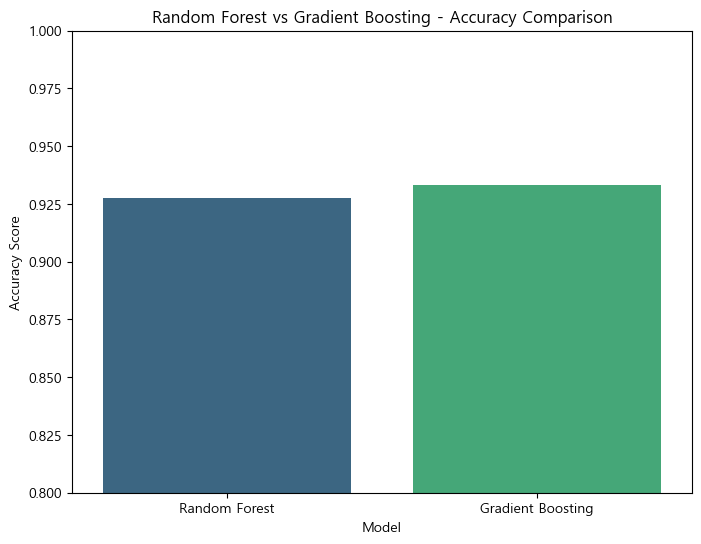

In [323]:
# 정확도 비교를 위한 데이터프레임 생성
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Accuracy': [rf_accuracy_top15, gb_accuracy_top15]
})

# 정확도 비교 막대 그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=model_comparison, x='Model', y='Accuracy', palette='viridis')

# 그래프 제목 및 라벨 설정
plt.title('Random Forest vs Gradient Boosting - Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1.0)  # 정확도 범위를 보기 좋게 조정
plt.show()


# 시각화 자료(2. Precision, Recall, F1-score 비교)

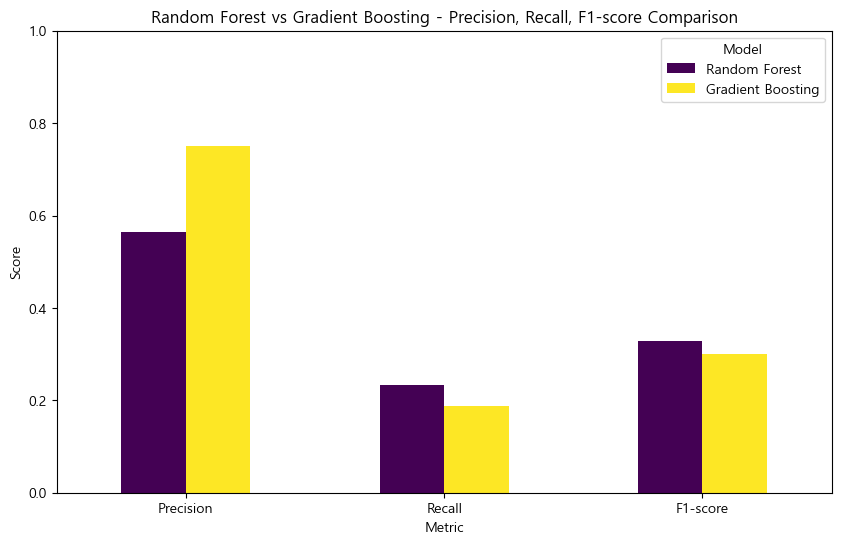

In [324]:
# 모델별 Precision, Recall, F1-score 추출
from sklearn.metrics import precision_score, recall_score, f1_score

# Random Forest 성능 지표
rf_precision = precision_score(y_test_top15_rf, rf_pred_top15)
rf_recall = recall_score(y_test_top15_rf, rf_pred_top15)
rf_f1 = f1_score(y_test_top15_rf, rf_pred_top15)

# Gradient Boosting 성능 지표
gb_precision = precision_score(y_test_top15, gb_pred_top15)
gb_recall = recall_score(y_test_top15, gb_pred_top15)
gb_f1 = f1_score(y_test_top15, gb_pred_top15)

# 비교를 위한 데이터프레임 생성
metrics_comparison = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-score'],
    'Random Forest': [rf_precision, rf_recall, rf_f1],
    'Gradient Boosting': [gb_precision, gb_recall, gb_f1]
})

# Precision, Recall, F1-score 비교 막대 그래프 시각화
metrics_comparison.set_index('Metric').plot(kind='bar', figsize=(10, 6), colormap='viridis', rot=0)

# 그래프 제목 및 라벨 설정
plt.title('Random Forest vs Gradient Boosting - Precision, Recall, F1-score Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.0)  # 0~1 범위에서 보기 좋게 조정
plt.legend(title='Model')
plt.show()


# RandomForest, GradientBoost (전체2개와 15개 컬럼 선택2개)의 전체 ROC_CURVE, SCORE COMPARISON

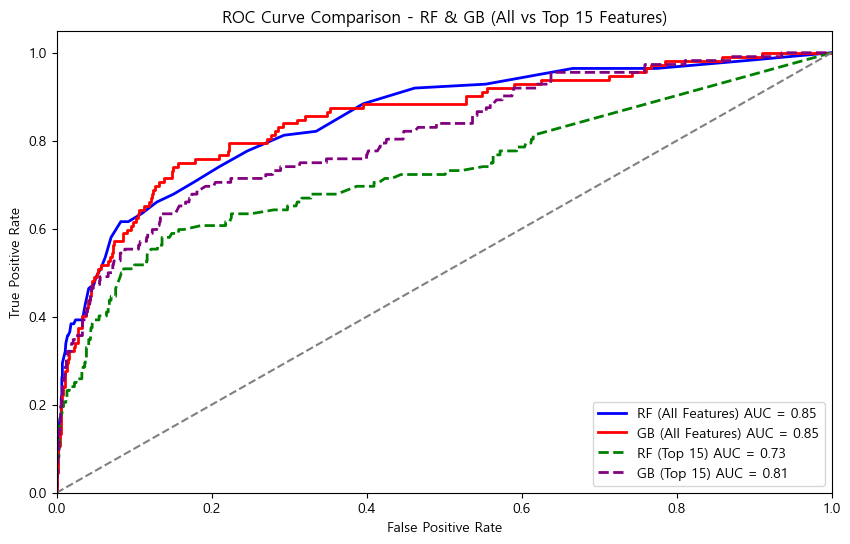

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13932\1650310513.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_comparison, x='Model', y='Accuracy', palette='viridis')


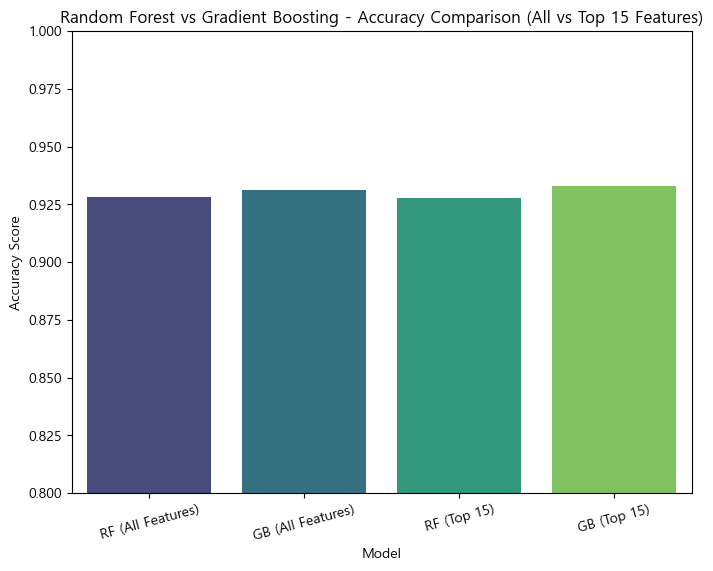

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13932\1650310513.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_comparison, x='Model', y='AUC', palette='coolwarm')


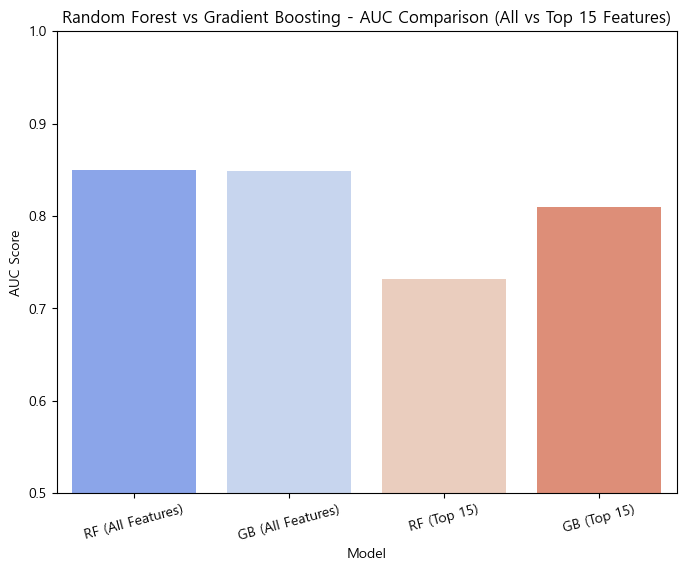

In [325]:
# ROC Curve 및 모델 성능 비교 시각화

plt.figure(figsize=(10, 6))

# 전체 컬럼 Random Forest
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'RF (All Features) AUC = {roc_auc:.2f}')

# 전체 컬럼 Gradient Boosting
plt.plot(gb_fpr, gb_tpr, color='red', lw=2, label=f'GB (All Features) AUC = {gb_roc_auc:.2f}')

# 15개 상위 컬럼 Random Forest
plt.plot(rf_fpr_top15, rf_tpr_top15, color='green', lw=2, linestyle='dashed', label=f'RF (Top 15) AUC = {rf_roc_auc_top15:.2f}')

# 15개 상위 컬럼 Gradient Boosting
plt.plot(gb_fpr_top15, gb_tpr_top15, color='purple', lw=2, linestyle='dashed', label=f'GB (Top 15) AUC = {gb_roc_auc_top15:.2f}')

# 대각선 기준선 추가
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# 그래프 설정
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - RF & GB (All vs Top 15 Features)')
plt.legend(loc="lower right")
plt.show()

# 모델별 성능 비교 데이터프레임
model_comparison = pd.DataFrame({
    'Model': ['RF (All Features)', 'GB (All Features)', 'RF (Top 15)', 'GB (Top 15)'],
    'Accuracy': [rf_accuracy, gb_accuracy, rf_accuracy_top15, gb_accuracy_top15],
    'AUC': [roc_auc, gb_roc_auc, rf_roc_auc_top15, gb_roc_auc_top15]
})

# 정확도 비교 바 그래프
plt.figure(figsize=(8, 6))
sns.barplot(data=model_comparison, x='Model', y='Accuracy', palette='viridis')
plt.title('Random Forest vs Gradient Boosting - Accuracy Comparison (All vs Top 15 Features)')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1.0)  # 정확도 범위 조정
plt.xticks(rotation=15)
plt.show()

# AUC 비교 바 그래프
plt.figure(figsize=(8, 6))
sns.barplot(data=model_comparison, x='Model', y='AUC', palette='coolwarm')
plt.title('Random Forest vs Gradient Boosting - AUC Comparison (All vs Top 15 Features)')
plt.ylabel('AUC Score')
plt.ylim(0.5, 1.0)  # AUC 범위 조정
plt.xticks(rotation=15)
plt.show()



✅ 확인해야 하는 부분
- 특성 수가 줄어들면서 랜덤 포레스트의 정보 활용도가 떨어졌고, 이에 따라 정확도가 낮아졌을 가능성이 높음. 해결책으로는 Feature Selection 개선 및 하이퍼파라미터 튜닝이 필요함!

# 3년간 삼성 브랜드 사용자 제거 Gradient Boosting, Random Forest

### Gradient Boosting

In [326]:
# 데이터 불러오기
file_path = './data/phone_information.csv'
phone_df = pd.read_csv(file_path)


# 3년간 삼성 브랜드를 사용한 고객만 필터링
phone_df = phone_df[(phone_df['brand_21'] == 1) | 
                    (phone_df['brand_22'] == 1) | 
                    (phone_df['brand_23'] == 1)]

# 3년간 삼성 브랜드를 사용하지 않은 고객 제거
phone_df = phone_df[~((phone_df['brand_21'] == 0) & 
                       (phone_df['brand_22'] == 0) & 
                       (phone_df['brand_23'] == 0))]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13932\3809621497.py:3: DtypeWarning: Columns (29,33,34,35,36,37,38,39,40,41,42,53,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  phone_df = pd.read_csv(file_path)


In [327]:
# 데이터 전처리: 문자열을 정수형으로 변환
phone_df = phone_df.apply(pd.to_numeric, errors='coerce')

# NaN 값 처리: NaN 값을 0으로 채우기
phone_df.fillna(0, inplace=True)

# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 상관 관계 분석
correlation_matrix = phone_df.corr()

# 상관 관계가 높은 상위 15개의 특성 선택 (이탈 여부와 가장 높은 상관 관계를 갖는 특성 선택)
target = 'brand_22'
correlation_with_target = correlation_matrix[target].drop(target)
top_15_features = correlation_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

# 데이터 X, y
X = phone_df[top_15_features]
y = (phone_df['brand_22'] != 1).astype(int)  # 이탈자(1) 예측

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Gradient Boosting 성능:               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1265
           1       0.73      0.36      0.48       107

    accuracy                           0.94      1372
   macro avg       0.84      0.67      0.72      1372
weighted avg       0.93      0.94      0.93      1372

Gradient Boosting 정확도: 0.9395


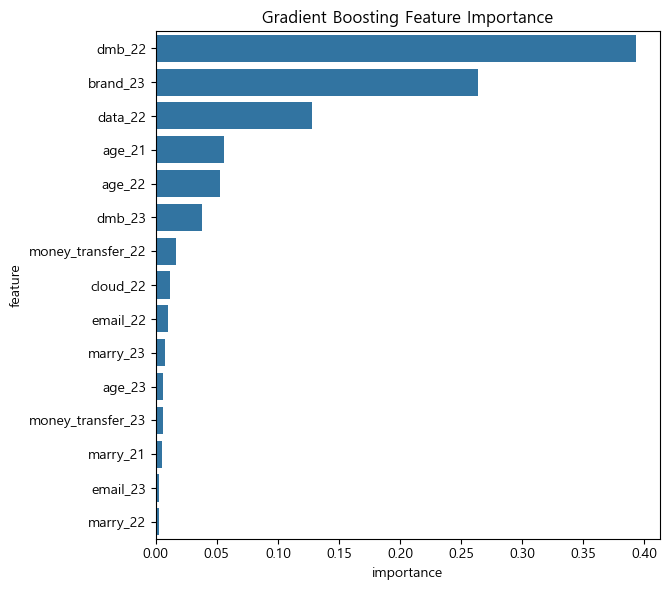

In [328]:
# Gradient Boosting 모델 학습
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# 예측 및 평가
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Gradient Boosting 성능: {classification_report(y_test, gb_pred)}")
print(f"Gradient Boosting 정확도: {gb_accuracy:.4f}")

# Gradient Boosting 특성 중요도
plt.figure(figsize=(12, 6))
importance_gb = pd.DataFrame({
    'feature': top_15_features,
    'importance': gb_clf.feature_importances_
})
importance_gb = importance_gb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
sns.barplot(data=importance_gb, x='importance', y='feature')
plt.title('Gradient Boosting Feature Importance')

plt.tight_layout()
plt.show()

# 삼성 브랜드 사용자만 필터링하고, 다른 브랜드 사용자를 제외한 후, 그 데이터를 사용하여 Gradient Boosting, Random Forest

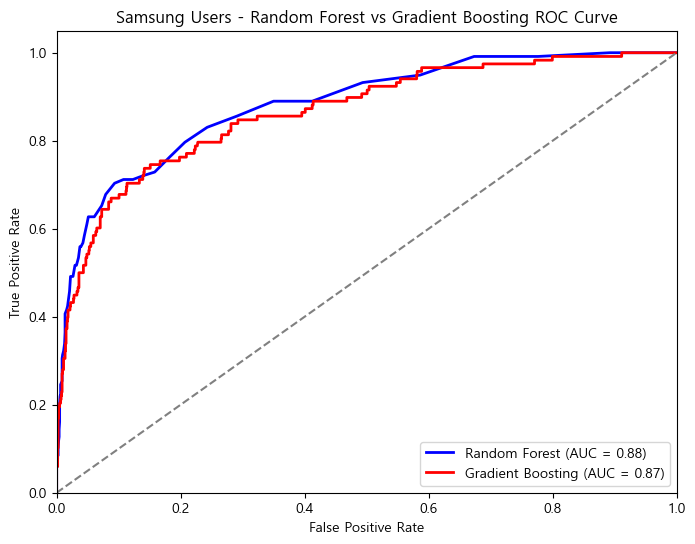

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13932\730636754.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_comparison_samsung, x='Model', y='Accuracy', palette='viridis')


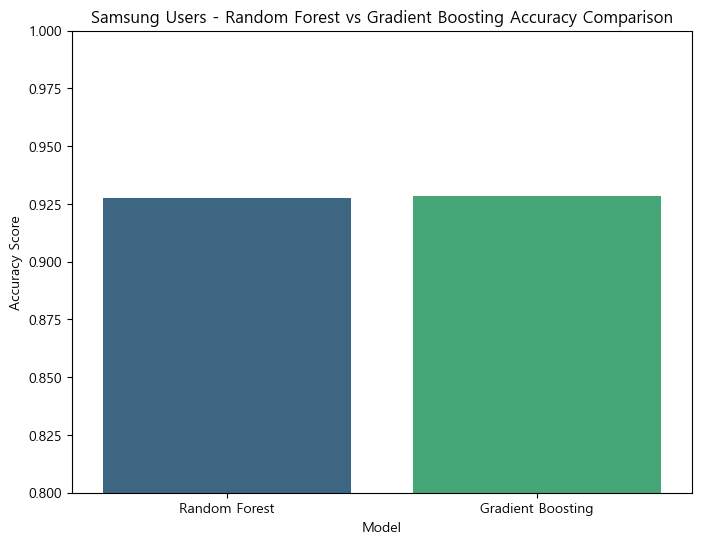

Samsung Users - Random Forest 성능:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1252
           1       0.79      0.22      0.34       118

    accuracy                           0.93      1370
   macro avg       0.86      0.61      0.65      1370
weighted avg       0.92      0.93      0.91      1370

Random Forest 정확도: 0.9277

Samsung Users - Gradient Boosting 성능:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1252
           1       0.69      0.31      0.43       118

    accuracy                           0.93      1370
   macro avg       0.81      0.65      0.70      1370
weighted avg       0.92      0.93      0.92      1370

Gradient Boosting 정확도: 0.9285


In [329]:
# 삼성 브랜드 사용자만 필터링 (예: brand_21이 삼성 브랜드를 의미한다고 가정)
samsung_users = phone_df[phone_df['brand_21'] == 1]  # 삼성 브랜드 사용자만 선택

# 데이터 X, y 설정 (삼성 사용자 데이터 사용)
X_samsung = samsung_users[selected_features].fillna(0)  # 결측값 0으로 채움
y_samsung = (samsung_users['brand_22'] != 1).astype(int)  # 삼성 브랜드 유지 여부 (1: 변경, 0: 유지)

# 데이터 분할
X_train_samsung, X_test_samsung, y_train_samsung, y_test_samsung = train_test_split(
    X_samsung, y_samsung, test_size=0.2, random_state=42
)

# Random Forest 모델 학습
rf_clf_samsung = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_samsung.fit(X_train_samsung, y_train_samsung)

# 예측 및 평가 (Random Forest)
rf_pred_samsung = rf_clf_samsung.predict(X_test_samsung)
rf_accuracy_samsung = accuracy_score(y_test_samsung, rf_pred_samsung)
rf_classification_rep_samsung = classification_report(y_test_samsung, rf_pred_samsung)

# Gradient Boosting 모델 학습
gb_clf_samsung = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf_samsung.fit(X_train_samsung, y_train_samsung)

# 예측 및 평가 (Gradient Boosting)
gb_pred_samsung = gb_clf_samsung.predict(X_test_samsung)
gb_accuracy_samsung = accuracy_score(y_test_samsung, gb_pred_samsung)
gb_classification_rep_samsung = classification_report(y_test_samsung, gb_pred_samsung)

# Random Forest ROC 커브 계산 및 시각화
rf_fpr_samsung, rf_tpr_samsung, _ = roc_curve(y_test_samsung, rf_clf_samsung.predict_proba(X_test_samsung)[:, 1])
rf_roc_auc_samsung = auc(rf_fpr_samsung, rf_tpr_samsung)

# Gradient Boosting ROC 커브 계산 및 시각화
gb_fpr_samsung, gb_tpr_samsung, _ = roc_curve(y_test_samsung, gb_clf_samsung.predict_proba(X_test_samsung)[:, 1])
gb_roc_auc_samsung = auc(gb_fpr_samsung, gb_tpr_samsung)

# ROC 비교 그래프
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr_samsung, rf_tpr_samsung, color='blue', lw=2, label=f'Random Forest (AUC = {rf_roc_auc_samsung:.2f})')
plt.plot(gb_fpr_samsung, gb_tpr_samsung, color='red', lw=2, label=f'Gradient Boosting (AUC = {gb_roc_auc_samsung:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Samsung Users - Random Forest vs Gradient Boosting ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 모델 성능 비교 시각화
model_comparison_samsung = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Accuracy': [rf_accuracy_samsung, gb_accuracy_samsung]
})

plt.figure(figsize=(8, 6))
sns.barplot(data=model_comparison_samsung, x='Model', y='Accuracy', palette='viridis')
plt.title('Samsung Users - Random Forest vs Gradient Boosting Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1.0)  # 정확도 범위 조정
plt.show()

# 결과 출력
print("Samsung Users - Random Forest 성능:")
print(rf_classification_rep_samsung)
print(f"Random Forest 정확도: {rf_accuracy_samsung:.4f}\n")

print("Samsung Users - Gradient Boosting 성능:")
print(gb_classification_rep_samsung)
print(f"Gradient Boosting 정확도: {gb_accuracy_samsung:.4f}")
